In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams


### Example dataset: Number of wikipedia articles in a few languages

In [3]:
dataset = pd.read_csv("datasets/wikipedia.csv")

In [4]:
dataset

,Language,Articles
0,French,1988251
1,Russian,1476042
2,Italian,1440470
3,Japanese,1108424
4,Czech,406278


### Example in matplotlib

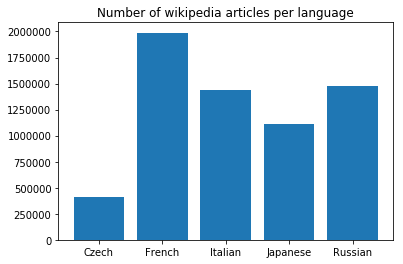

In [5]:
plt.bar(dataset.Language, dataset.Articles)
plt.title("Number of wikipedia articles per language")
plt.show()

Add colours

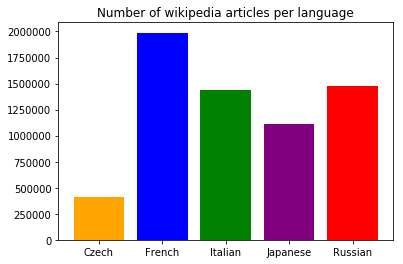

In [14]:
colors = ["blue","red","green", "purple", "orange"]
plt.bar(dataset.Language, dataset.Articles, color=colors)
plt.title("Number of wikipedia articles per language")
plt.show()

### Example without matplotlib (index must be x axis labels)

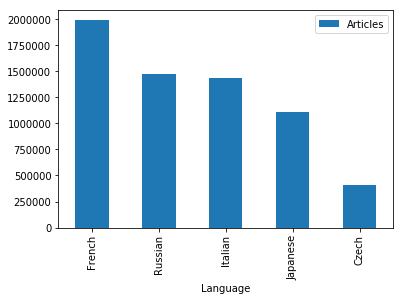

In [24]:
# .plot.bar is included in pandas
dataset2=dataset.set_index("Language")
dataset2.plot.bar()

### Example with numbers

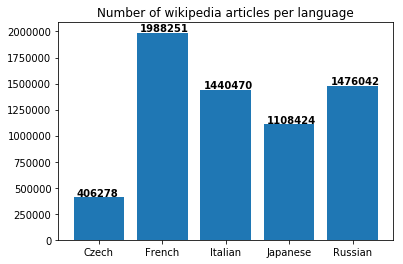

In [57]:
# By default plt orders by language name (alphabetic order)
# order them like that to calculate the numbers position
ordered_dataset = dataset.sort_values("Language")

fig, ax = plt.subplots()
plt.bar(ordered_dataset.Language, ordered_dataset.Articles)

plt.title("Number of wikipedia articles per language")
for i,v in enumerate(ordered_dataset.Articles):
    ax.text(i-0.35, v+15000, v, fontweight='bold')


Format numbers

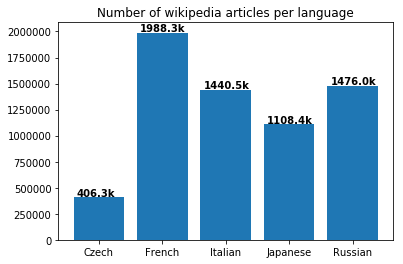

In [65]:
# By default plt orders by language name (alphabetic order)
# order them like that to calculate the numbers position
ordered_dataset = dataset.sort_values("Language")

def formatter(num, m=1000):
    num = float(num/m)
    return '{0:.1f}k'.format(num)

fig, ax = plt.subplots()
plt.bar(ordered_dataset.Language, ordered_dataset.Articles)

plt.title("Number of wikipedia articles per language")
for i,v in enumerate(ordered_dataset.Articles):
    ax.text(i-0.35, v+16000, formatter(v), fontweight='bold')


It might look better without axis

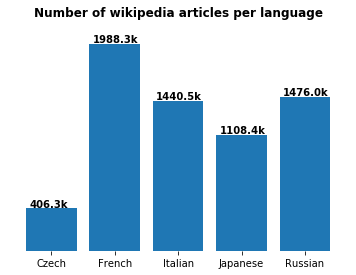

In [71]:
ordered_dataset = dataset.sort_values("Language")

def formatter(num, m=1000):
    num = float(num/m)
    return '{0:.1f}k'.format(num)

fig, ax = plt.subplots()
plt.bar(ordered_dataset.Language, ordered_dataset.Articles)

plt.title("Number of wikipedia articles per language", fontweight="bold")
for i,v in enumerate(ordered_dataset.Articles):
    ax.text(i-0.35, v+16000, formatter(v), fontweight='bold')

#Delete axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#Add a little space below the title
ttl = ax.title
ttl.set_position([.5, 1.05])

#Delete ticks
ax.get_yaxis().set_ticks([])
plt.show()

## Examples: Titanic dataset

In [72]:
titanic = pd.read_csv("datasets/titanic.csv")

In [73]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Fast way to see number of occurrences per category using value_counts()

In [84]:
classes = titanic.pclass.value_counts()

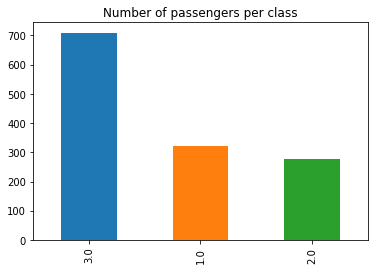

In [85]:
classes.plot.bar(title="Number of passengers per class")

### Bar plot with groups of bars: Seaborn version

AttributeError: Unknown property title

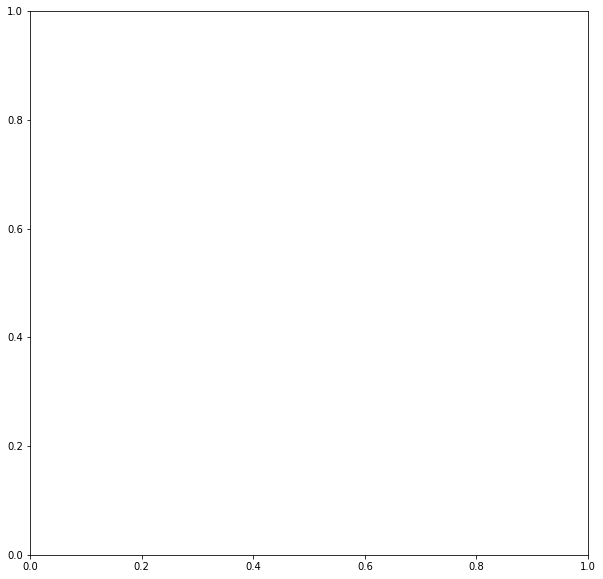

In [136]:
sns.barplot(x="sex", y="survived", hue="pclass", data=titanic, title="Titanic: Number of survivors per sex and class");

### Bar plot with groups of bars: Matplotlib version

In [107]:
female_all =  titanic[titanic["sex"]=="female"]
female_first_class = len(female_all[female_all["pclass"]==1])
female_second_class = len(female_all[female_all["pclass"]==2])
female_third_class = len(female_all[female_all["pclass"]==3])

female = [female_first_class, female_second_class, female_third_class]

male_all =  titanic[titanic["sex"]=="male"]

male_first_class = len(male_all[male_all["pclass"]==1])
male_second_class = len(male_all[male_all["pclass"]==2])
male_third_class = len(male_all[male_all["pclass"]==3])

male = [male_first_class, male_second_class, male_third_class]

groups = ["First class", "Second class", "Third class"]

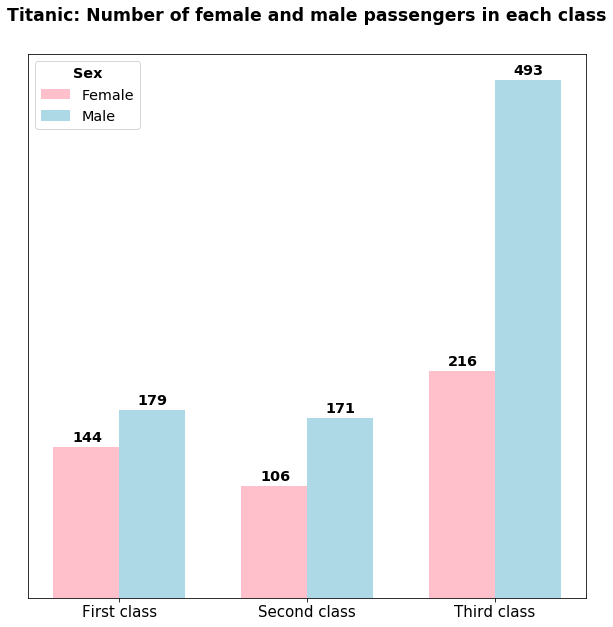

In [135]:
def formatter(num, m=1):
    return '{0:.0f}'.format(num)

ind = np.arange(len(female))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(ind-width/2, female , width,
                color='Pink', label='Female')
rects2 = ax.bar(ind+width/2, male, width,
                color="LightBlue", label='Male')

ax.set_title('Titanic: Number of female and male passengers in each class',fontsize='xx-large', fontweight='bold')
ax.set_xticks(ind)
ax.set_xticklabels(groups)
ax.legend()
legend = ax.legend(loc=0, ncol=1, bbox_to_anchor=(0, 0, 1, 1),fancybox=True,shadow=False,title="Sex",fontsize='x-large')
plt.setp(legend.get_title(),fontsize='x-large', fontweight='bold')

#Hide spines and ticks only if you want
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

plt.tick_params(axis='both', which='major', labelsize=15)

for i, v in enumerate(male):
    ax.text(i+0.1, v+5, str(formatter(v)), fontweight='bold',fontsize='x-large')
for i, v in enumerate(female):
    ax.text(i-0.25, v+5, str(formatter(v)), fontweight='bold',fontsize='x-large')

ax.get_yaxis().set_ticks([])
ttl = ax.title
ttl.set_position([.5, 1.05])

rcParams['figure.figsize'] = 10, 10
